<a href="https://colab.research.google.com/github/KushalranaAI/Data-Analysis-projects/blob/main/HealthApp_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data collection
Filter out the log throug parsing and regex function

In [1]:
import pandas as pd
import re

# Read the log file into list of strings with encoding
with open('/content/HealthApp.log', encoding='ISO-8859-1') as f:
    log_data = f.readlines()

# Define the column name for the dataframe
columns = ['timestamp', 'module', 'id', 'message']

# Initialize an empty list to store the parsed log data
parse_log_data = []

# Loop through each line of the log file
for line in log_data:
    # Remove any non-printable character from the line
    line = re.sub('[^\x20-\x7E]+', '', line)

    # Split the line into its components using the '|' separator
    components = line.strip().split('|')

    # Extract the timestamp components and convert to a pandas datetime object
    timestamp_str = components[0]
    timestamp = pd.to_datetime(timestamp_str, format='%Y%m%d-%H:%M:%S:%f', errors='coerce')

    # Extract the module, id, and message components
    module = components[1]
    id = components[2]
    message = components[3]

    # Add the parsed components to the parsed_log_data list
    parse_log_data.append([timestamp, module, id, message])

# Convert the parsed_log_data list to a pandas DataFrame
log_df = pd.DataFrame(parse_log_data, columns=columns)


In [2]:
import pandas as pd
log_df.head(10)

,timestamp,module,id,message
0,2017-12-23 22:15:29.606,Step_LSC,30002312,onStandStepChanged 3579
1,2017-12-23 22:15:29.615,Step_LSC,30002312,onExtend:1514038530000 14 0 4
2,2017-12-23 22:15:29.633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON
3,2017-12-23 22:15:29.635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...
4,2017-12-23 22:15:29.635,Step_StandStepCounter,30002312,flush sensor data
5,2017-12-23 22:15:29.635,Step_SPUtils,30002312,getTodayTotalDetailSteps = 1514038440000##699...
6,2017-12-23 22:15:29.636,Step_SPUtils,30002312,setTodayTotalDetailSteps=1514038440000##7007##...
7,2017-12-23 22:15:29.636,Step_LSC,30002312,onStandStepChanged 3579
8,2017-12-23 22:15:29.645,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=126775
9,2017-12-23 22:15:29.648,Step_ExtSDM,30002312,calculateAltitudeWithCache totalAltitude=240


As we observe the above pandas dataframe we se that there are four feature columns, timestamp(having year,month,dat,hour,minutes,second and miliseconds), modulus(parameters that detect by device), ID(device id), message(log data generated by device sensor every miliseocnds).
If we observe the data carefully we find that this dataset is generated by a smart watch and their is only one device.

In [3]:
data = log_df

In [4]:
data.info() #one feature is in datetime format and other are object datatype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253395 entries, 0 to 253394
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   timestamp  253395 non-null  datetime64[ns]
 1   module     253395 non-null  object        
 2   id         253395 non-null  object        
 3   message    253395 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 7.7+ MB


In [5]:
data.isnull().sum()  # there is no null value in a dataset

timestamp    0
module       0
id           0
message      0
dtype: int64

In [6]:
data.duplicated().sum()  ## there are 425 duplicate value in a dataset

425

In [7]:
data.drop_duplicates(inplace=True)   # removing ducplicate from datset

In [8]:
data.shape  ## size of a dataset

(252970, 4)

In [9]:
data['module'].unique()  # In this step, we know that there are 35 different modulus means 35 parameter are detect by device sensors

array(['Step_LSC', 'Step_StandReportReceiver', 'Step_StandStepCounter',
       'Step_SPUtils', 'Step_ExtSDM', 'Step_ScreenUtil',
       'Step_FlushableStepDataCache', 'HiH_HiAppUtil',
       'HiH_HiHealthBinder', 'HiH_HiHealthDataInsertStore',
       'HiH_DataStatManager', 'HiH_ListenerManager', 'HiH_HiSyncControl',
       'HiH_HiSyncUtil', 'HiH_', 'HiH_HiBroadcastUtil',
       'Step_StandStepDataManager', 'Step_DataCache', 'Step_HGNH',
       'Step_NotificationUtil', 'Step_ReportController',
       'Step_StaticReceiver', 'Step_UserInfo', 'Step_CounterSupport',
       'Step_CfgFilePolicy', 'Step_StepCounterManager',
       'Step_UIWidgetManager', 'Step_MidwareStepCounter',
       'Step_UIManager', 'Step_UploadStaticAlarmUtil',
       'Step_DaemonService', 'HiH_HiHealthService',
       'Step_OneMinuteStepData', 'Step_CounterRemoteProxy',
       'HiH_HiDataClientStore'], dtype=object)

In [10]:
modules = ['Step_LSC', 'Step_SPUtils', 'Step_ExtSDM']  ## selecting there major modulus which cantain calories, number of steps, altitude. These modulus contain 80% of dataset.
data =data[data['module'].isin(modules)]

In [11]:
data.shape  # size of dataset after selecting particular modulus

(192073, 4)

In [12]:
## splitting timestamp into a multiple sub feature column so analysis become easy
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day
data['hour'] = data['timestamp'].dt.hour


<ipython-input-12-53d0f781e738>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data['timestamp'].dt.year
<ipython-input-12-53d0f781e738>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['timestamp'].dt.month
<ipython-input-12-53d0f781e738>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [13]:
data['minute'] = data['timestamp'].dt.minute

<ipython-input-13-6783c62320a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['minute'] = data['timestamp'].dt.minute


In [18]:
data.drop('timestamp', axis=1)

,module,id,message,year,month,day,hour,minute,num_steps,altitude,calories
0,Step_LSC,30002312,onStandStepChanged 3579,2017,12,23,22,15,NaN,NaN,NaN
1,Step_LSC,30002312,onExtend:1514038530000 14 0 4,2017,12,23,22,15,NaN,NaN,NaN
3,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,2017,12,23,22,15,NaN,NaN,NaN
5,Step_SPUtils,30002312,getTodayTotalDetailSteps = 1514038440000##699...,2017,12,23,22,15,NaN,NaN,NaN
6,Step_SPUtils,30002312,setTodayTotalDetailSteps=1514038440000##7007##...,2017,12,23,22,15,7007.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
253390,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=52108,2018,1,3,9,56,NaN,NaN,52108.0
253391,Step_ExtSDM,30002312,calculateAltitudeWithCache totalAltitude=60,2018,1,3,9,56,NaN,60.0,NaN
253392,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,2018,1,3,9,57,NaN,NaN,NaN
253393,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,2018,1,3,9,58,NaN,NaN,NaN


In [14]:
data.duplicated().sum() 

0

In [15]:
data['message'].sample(20)

140265                         onExtend:1514599880000 1 0 4
214220       calculateCaloriesWithCache totalCalories=35599
35890          calculateAltitudeWithCache totalAltitude=630
42414           calculateAltitudeWithCache totalAltitude=90
161191         calculateAltitudeWithCache totalAltitude=570
114504                             onStandStepChanged 18715
94127      getTodayTotalDetailSteps = 1514369700000##482...
198436        calculateCaloriesWithCache totalCalories=5349
68973        calculateCaloriesWithCache totalCalories=24456
571       setTodayTotalDetailSteps=1514038620000##7112##...
70953     setTodayTotalDetailSteps=1514250660000##1489##...
38925                          onExtend:1514159997000 0 0 5
229960    setTodayTotalDetailSteps=1514879460000##11854#...
89855         calculateCaloriesWithCache totalCalories=9205
237610      calculateCaloriesWithCache totalCalories=443146
47021      getTodayTotalDetailSteps = 1514200320000##721...
5054         calculateCaloriesWithCache 

In [16]:
data.isnull().sum()

timestamp    0
module       0
id           0
message      0
year         0
month        0
day          0
hour         0
minute       0
dtype: int64

Using regex function to extract a useful data from message column and create three main columns calerios, num_steps, altitude

In [17]:
import re

# Define the regular expressions to extract the required information
cal_regex = r'totalCalories=(\d+)'
step_regex = r'setTodayTotalDetailSteps=\d+##(\d+)##'
alt_regex = r'totalAltitude=(\d+)'

# Create lists to store the extracted information
calories = []
num_steps = []
altitude = []

# Loop through the log messages and extract the information
for log in data['message']:
    # Extract the number of steps
    match = re.search(step_regex, log)
    if match:
        num_steps.append(int(match.group(1)))
    else:
        num_steps.append(None)
        
    # Extract the altitude
    match = re.search(alt_regex, log)
    if match:
        altitude.append(int(match.group(1)))
    else:
        altitude.append(None)
    
    # Extract the calories
    match = re.search(cal_regex, log)
    if match:
        calories.append(int(match.group(1)))
    else:
        calories.append(None)

# Add the features to the original dataframe
data['num_steps'] = num_steps
data['altitude'] = altitude
data['calories'] = calories


<ipython-input-17-400d30b5b0d1>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_steps'] = num_steps
<ipython-input-17-400d30b5b0d1>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['altitude'] = altitude
<ipython-input-17-400d30b5b0d1>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [19]:
data.sample(40)

,timestamp,module,id,message,year,month,day,hour,minute,num_steps,altitude,calories
151750,2017-12-30 16:17:04.200,Step_ExtSDM,30002312,calculateAltitudeWithCache totalAltitude=300,2017,12,30,16,17,NaN,300.0,NaN
87137,2017-12-26 23:27:13.630,Step_SPUtils,30002312,getTodayTotalDetailSteps = 1514301960000##550...,2017,12,26,23,27,NaN,NaN,NaN
115994,2017-12-28 22:20:02.655,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=205395,2017,12,28,22,20,NaN,NaN,205395.0
203904,2018-01-01 19:24:47.652,Step_LSC,30002312,onStandStepChanged 12971,2018,1,1,19,24,NaN,NaN,NaN
124318,2017-12-29 12:29:37.320,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=48508,2017,12,29,12,29,NaN,NaN,48508.0
184978,2017-12-31 14:33:40.384,Step_LSC,30002312,onExtend:1514699830000 0 0 5,2017,12,31,14,33,NaN,NaN,NaN
5430,2017-12-24 11:43:24.715,Step_ExtSDM,30002312,calculateAltitudeWithCache totalAltitude=0,2017,12,24,11,43,NaN,0.0,NaN
81864,2017-12-26 22:02:09.784,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=145132,2017,12,26,22,2,NaN,NaN,145132.0
216394,2018-01-02 08:13:40.331,Step_SPUtils,30002312,getTodayTotalDetailSteps = 1514851920000##227...,2018,1,2,8,13,NaN,NaN,NaN
3302,2017-12-24 03:41:35.876,Step_ExtSDM,30002312,calculateAltitudeWithCache totalAltitude=0,2017,12,24,3,41,NaN,0.0,NaN


In this step, I convert all NAN value to with 0 and chnage ther data type to integer

In [20]:
import numpy as np

# Replace missing and infinite values with a default value
data['num_steps'] = data['num_steps'].replace([np.inf, -np.inf, np.nan], 0)

# Convert the num_steps data to an integer type
data['num_steps'] = data['num_steps'].astype(int)

# Replace missing and infinite values with a default value
data['calories'] = data['calories'].replace([np.inf, -np.inf, np.nan], 0)

# Convert the num_steps data to an integer type
data['calories'] = data['calories'].astype(int)

# Replace missing and infinite values with a default value
data['altitude'] = data['altitude'].replace([np.inf, -np.inf, np.nan], 0)

# Convert the num_steps data to an integer type
data['altitude'] = data['altitude'].astype(int)

<ipython-input-20-9a240ed8ab80>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_steps'] = data['num_steps'].replace([np.inf, -np.inf, np.nan], 0)
<ipython-input-20-9a240ed8ab80>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_steps'] = data['num_steps'].astype(int)
<ipython-input-20-9a240ed8ab80>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [21]:
# change negative values to positive values
data['calories'] = data['calories'].abs()

<ipython-input-21-13aeeda183bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['calories'] = data['calories'].abs()


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192073 entries, 0 to 253394
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   timestamp  192073 non-null  datetime64[ns]
 1   module     192073 non-null  object        
 2   id         192073 non-null  object        
 3   message    192073 non-null  object        
 4   year       192073 non-null  int64         
 5   month      192073 non-null  int64         
 6   day        192073 non-null  int64         
 7   hour       192073 non-null  int64         
 8   minute     192073 non-null  int64         
 9   num_steps  192073 non-null  int64         
 10  altitude   192073 non-null  int64         
 11  calories   192073 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(3)
memory usage: 19.1+ MB


In [23]:
data.set_index(['timestamp'],inplace =True)  # set up the timestamp as a index value

In [24]:
data['calories'].unique()

array([     0, 126775, 126797, ...,  52065,  52086,  52108])

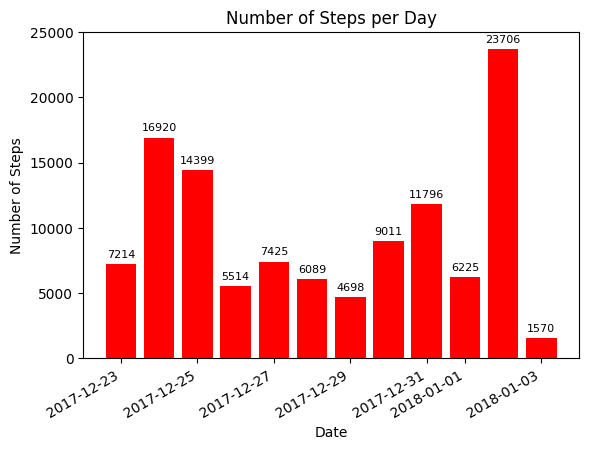

In [25]:
import pandas as pd
import matplotlib.pyplot as plt


# Compute the maximum number of steps
max_steps = data['num_steps'].max()

# Resample the data by day and compute the mean value of each day
daily_data = data['num_steps'].resample('D').max()

# Create a bar chart of the data
plt.bar(daily_data.index, daily_data.values, color="red")

# Add a title and axis labels
plt.title('Number of Steps per Day')
plt.xlabel('Date')
plt.ylabel('Number of Steps')

# Set the y-axis limits
plt.ylim([0, 25000])

# Add labels to each bar
for i, v in enumerate(daily_data):
    plt.text(daily_data.index[i], v + 500, str(int(v)), ha='center', fontsize=8)

# Automatically adjust the x-axis labels
plt.gcf().autofmt_xdate()

# Display the plot
plt.show()



Observations:
- Maximum number of steps cover by a user are 23706.
- User are mostly active in a 12 days data on a 02 Jan 2018, 24 Dec 2017, 25 Dec 2017
- User is mostely unactive on 29 Dec 2017 and 03-01-2018

<ipython-input-27-1ac741533770>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_data = data.resample('D').mean()


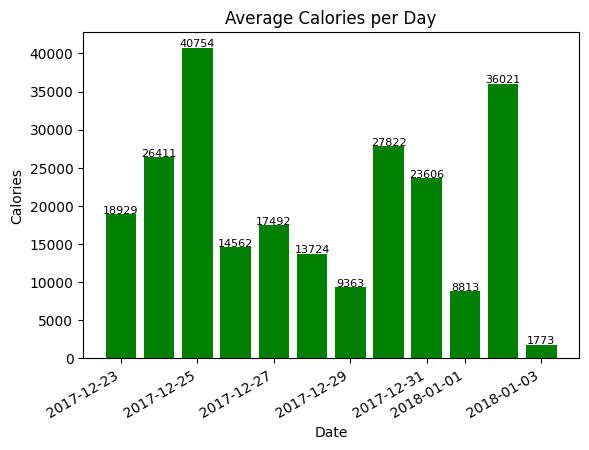

In [27]:
# Replace unrealistic values with the average of the values before and after
# for i in range(1, len(data['calories']) - 1):
#     if data['calories'][i] > 5000:
#         data['calories'][i] = (data['calories'][i] - data['calories'][i+1]) 

# Resample the data by day and compute the mean value of each day
daily_data = data.resample('D').mean()

# Create a line chart of the data
plt.bar(daily_data.index, daily_data['calories'], color="green")

# Add a title and axis labels
plt.title('Average Calories per Day')
plt.xlabel('Date')
plt.ylabel('Calories')

# Add labels to each data point
for i, v in enumerate(daily_data['calories']):
    plt.text(daily_data.index[i], v + 100, str(int(v)), ha='center', fontsize=8)

# Automatically adjust the x-axis labels
plt.gcf().autofmt_xdate()

# Display the plot
plt.show()


**Observations:**
- As we see a graph we found out that, user maximum calories are burn on 24,25,30,31 Dec 2017 and 2 Jan 2018.
- minimum calories on 3 Jan 2018 and 29 Dec 2017

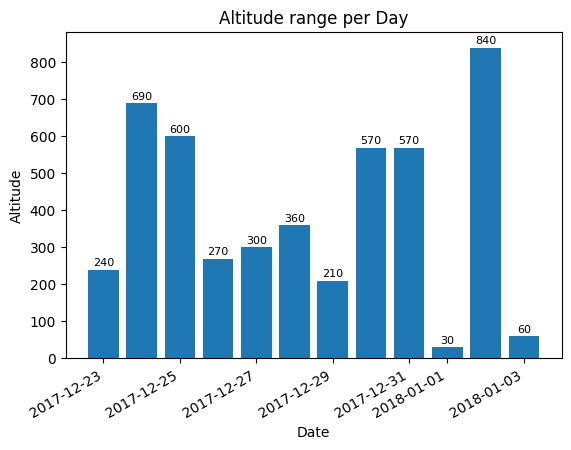

In [28]:
# Resample the data by day and compute the mean value of each day
daily_data = data['altitude'].resample('D').max()

# Create a bar chart of the data
plt.bar(daily_data.index, daily_data.values)

# Add a title and axis labels
plt.title('Altitude range per Day')
plt.xlabel('Date')
plt.ylabel('Altitude')

# # Set the y-axis limits
# plt.ylim([0, 1000])

# Add labels to each bar
for i, v in enumerate(daily_data):
    plt.text(daily_data.index[i], v+10, str(int(v)), ha='center', fontsize=8)

# Automatically adjust the x-axis labels
plt.gcf().autofmt_xdate()

# Display the plot
plt.show()


**Observation:**
- Maximun altitude that user reach is 840 on 2 Jan 2018
- Minimun altitude is 30 on 1 Jan 2018
- highest value of altitude that user achieve are 690, 600, 570

<ipython-input-29-030f5d41ba8c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_data = data.resample('D').mean()


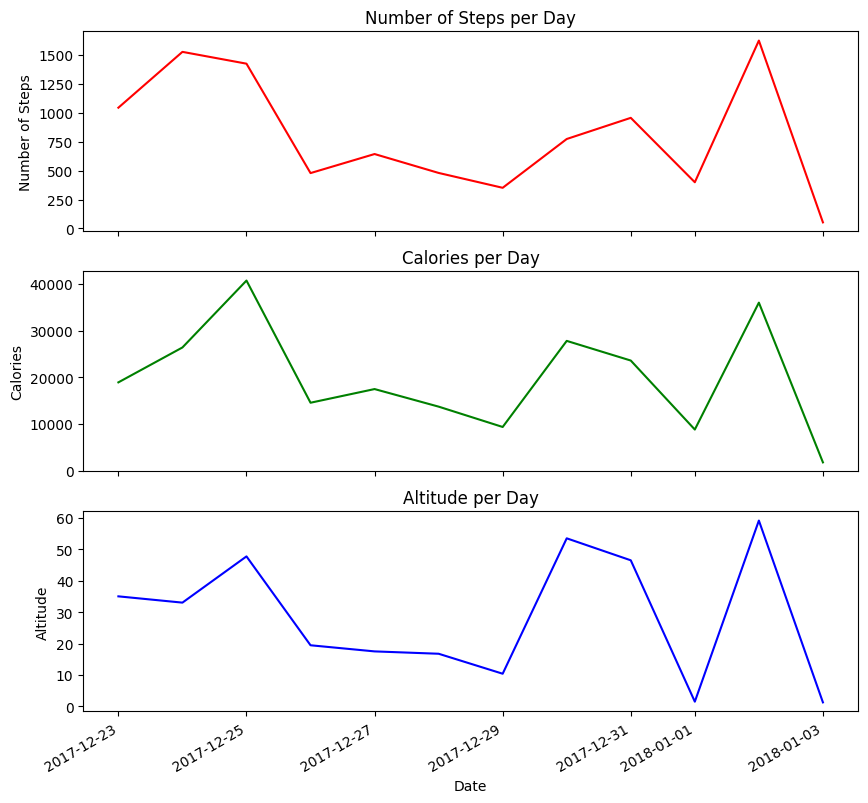

In [29]:
# Resample the data by day and compute the mean value of each day
daily_data = data.resample('D').mean()

# Create a new figure with 3 axes
fig, ax = plt.subplots(3, 1, figsize=(10, 10))

# Plot the number of steps on the first axis
ax[0].plot(daily_data.index, daily_data['num_steps'], color='red')
ax[0].set_title('Number of Steps per Day')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Number of Steps')

# Plot the calories on the second axis
ax[1].plot(daily_data.index, daily_data['calories'], color='green')
ax[1].set_title('Calories per Day')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Calories')

# Plot the altitude on the third axis
ax[2].plot(daily_data.index, daily_data['altitude'], color='blue')
ax[2].set_title('Altitude per Day')
ax[2].set_xlabel('Date')
ax[2].set_ylabel('Altitude')

# Automatically adjust the x-axis labels
fig.autofmt_xdate()

# Display the plot
plt.show()


**Observation**
- when a Number of step si high and altitude is low then calories burn are low.
- when a steps and altitude is low calories burn are also low.
- Whrn a steps and altittude is high colories burn is lao high.
- User are mostly active(means his step count, altitude and calories all are highest in 12 day period) on 25 Dec 2017 and 2 Jan 2018
-  User are mostly unactive(means his step count, altitude and calories all are lowest in 12 day period) on 26 Dec 2017 and 1, 3 Jan 2018

<ipython-input-30-066d157828d0>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_data = data.resample('D').mean()


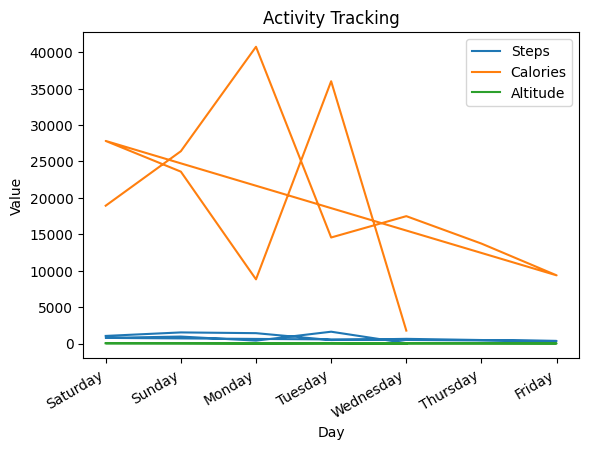

In [30]:
# Resample the data by day and compute the mean value of each day
daily_data = data.resample('D').mean()

# Create a line chart of the data
plt.plot(daily_data.index.strftime('%A'), daily_data['num_steps'], label='Steps')
plt.plot(daily_data.index.strftime('%A'), daily_data['calories'], label='Calories')
plt.plot(daily_data.index.strftime('%A'), daily_data['altitude'], label='Altitude')

# Add a title and axis labels
plt.title('Activity Tracking')
plt.xlabel('Day')
plt.ylabel('Value')

# Add a legend
plt.legend()

# Automatically adjust the x-axis labels
plt.gcf().autofmt_xdate()

# Display the plot
plt.show()


In [33]:
data.head(10)

,module,id,message,year,month,day,hour,minute,num_steps,altitude,calories
timestamp,,,,,,,,,,,
2017-12-23 22:15:29.606,Step_LSC,30002312,onStandStepChanged 3579,2017,12,23,22,15,0,0,0
2017-12-23 22:15:29.615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,2017,12,23,22,15,0,0,0
2017-12-23 22:15:29.635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,2017,12,23,22,15,0,0,0
2017-12-23 22:15:29.635,Step_SPUtils,30002312,getTodayTotalDetailSteps = 1514038440000##699...,2017,12,23,22,15,0,0,0
2017-12-23 22:15:29.636,Step_SPUtils,30002312,setTodayTotalDetailSteps=1514038440000##7007##...,2017,12,23,22,15,7007,0,0
2017-12-23 22:15:29.636,Step_LSC,30002312,onStandStepChanged 3579,2017,12,23,22,15,0,0,0
2017-12-23 22:15:29.645,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=126775,2017,12,23,22,15,0,0,126775
2017-12-23 22:15:29.648,Step_ExtSDM,30002312,calculateAltitudeWithCache totalAltitude=240,2017,12,23,22,15,0,240,0
2017-12-23 22:15:29.737,Step_LSC,30002312,onExtend:1514038530000 0 0 4,2017,12,23,22,15,0,0,0


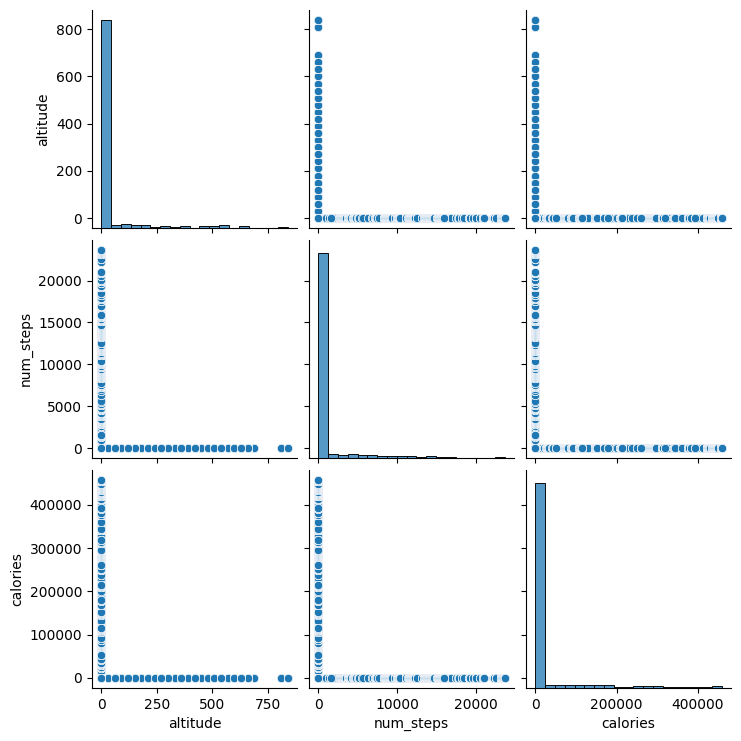

In [71]:
import seaborn as sns

# Select the variables we want to plot
vars_to_plot = ['altitude', 'num_steps', 'calories']

# Create the scatterplot matrix
sns.pairplot(data[vars_to_plot])


Pairplot not shown good because data is not normalized

<ipython-input-40-570d9a10f58b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['num_steps', 'calories', 'altitude']] = scaler.fit_transform(data[['num_steps', 'calories', 'altitude']])


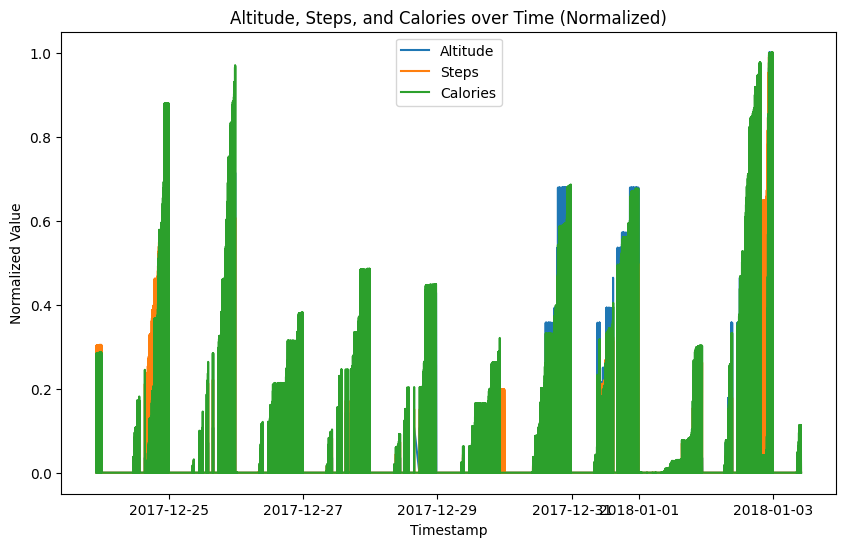

In [40]:
## Normalize the data so analysis beacome easy
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()

# Normalize the values in the columns
data[['num_steps', 'calories', 'altitude']] = scaler.fit_transform(data[['num_steps', 'calories', 'altitude']])

fig = plt.figure(figsize=(10, 6))
# Create a multiple line chart of the normalized data
plt.plot(data['altitude'], label='Altitude')
plt.plot(data['num_steps'], label='Steps')
plt.plot(data['calories'], label='Calories')

# Add a title and axis labels
plt.title('Altitude, Steps, and Calories over Time (Normalized)')
plt.xlabel('Timestamp')
plt.ylabel('Normalized Value')

# Add a legend
plt.legend()

# Display the plot
plt.show()

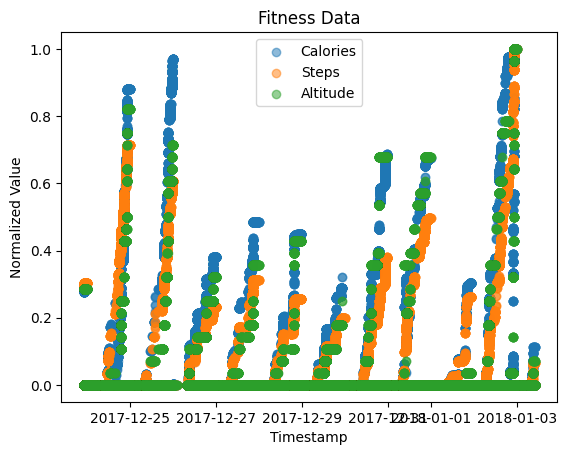

In [44]:
# Create a scatter plot of the data
plt.scatter(data.index, data['calories'], label='Calories', alpha=0.5)
plt.scatter(data.index, data['num_steps'], label='Steps', alpha=0.5)
plt.scatter(data.index, data['altitude'], label='Altitude', alpha=0.5)

# Add a title and axis labels
plt.title('Fitness Data')
plt.xlabel('Timestamp')
plt.ylabel('Normalized Value')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [48]:
data[['num_steps', 'calories', 'altitude']].head(20)

,num_steps,calories,altitude
timestamp,,,
2017-12-23 22:15:29.606,0.000000,0.000000,0.000000
2017-12-23 22:15:29.615,0.000000,0.000000,0.000000
2017-12-23 22:15:29.635,0.000000,0.000000,0.000000
2017-12-23 22:15:29.635,0.000000,0.000000,0.000000
2017-12-23 22:15:29.636,0.295579,0.000000,0.000000
2017-12-23 22:15:29.636,0.000000,0.000000,0.000000
2017-12-23 22:15:29.645,0.000000,0.276535,0.000000
2017-12-23 22:15:29.648,0.000000,0.000000,0.285714
2017-12-23 22:15:29.737,0.000000,0.000000,0.000000


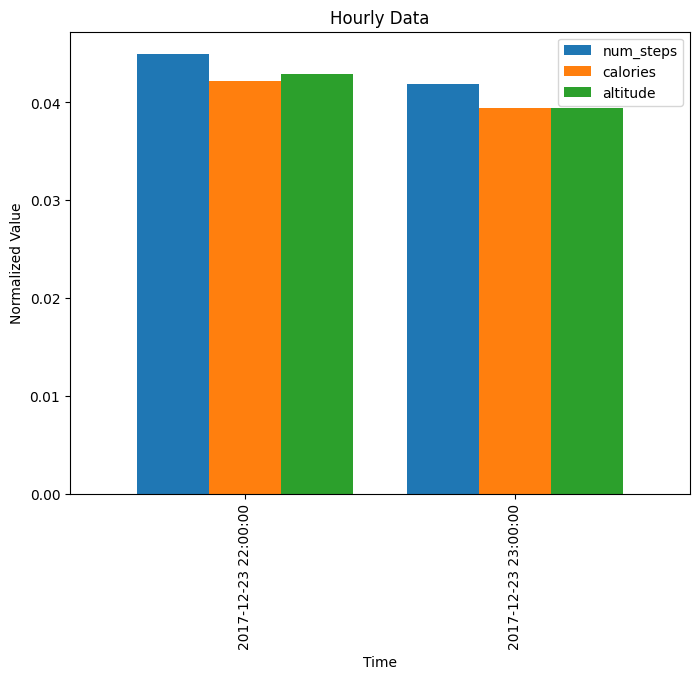

In [52]:
# Filter the data for December 23, 2017
selected_data = data[['num_steps', 'calories', 'altitude']].loc['2017-12-23']

# Resample the data by hour and compute the mean value of each hour
hourly_data = selected_data.resample('H').mean()

# Create a bar chart of the data
hourly_data.plot(kind='bar', width=0.8, figsize=(8, 6))

# Add a title and axis labels
plt.title('Hourly Data')
plt.xlabel('Time')
plt.ylabel('Normalized Value')

# Display the plot
plt.show()

Ploting a graph for every single day based hourly analysis.

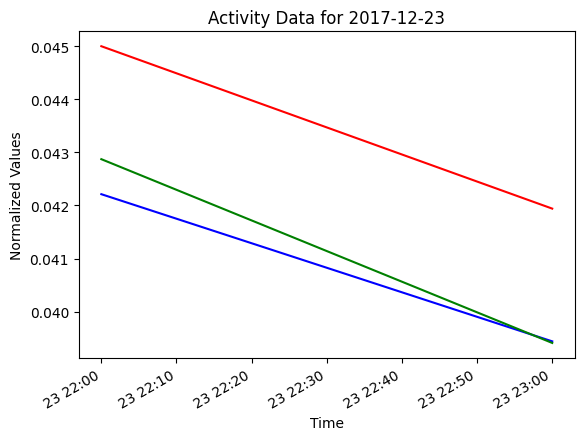

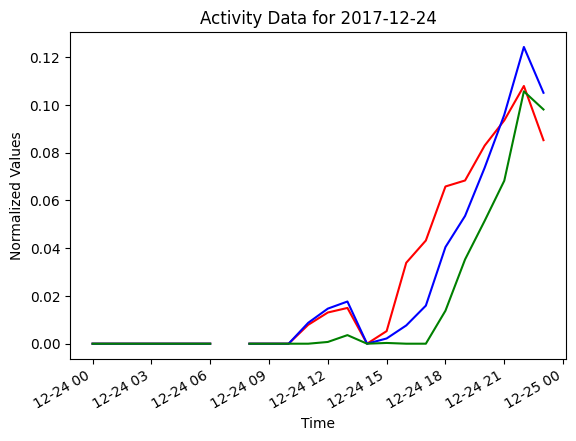

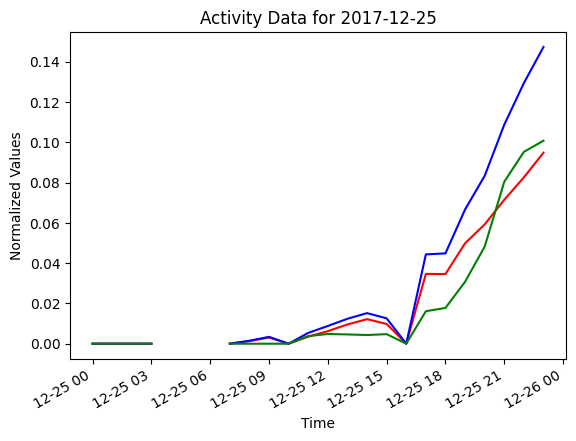

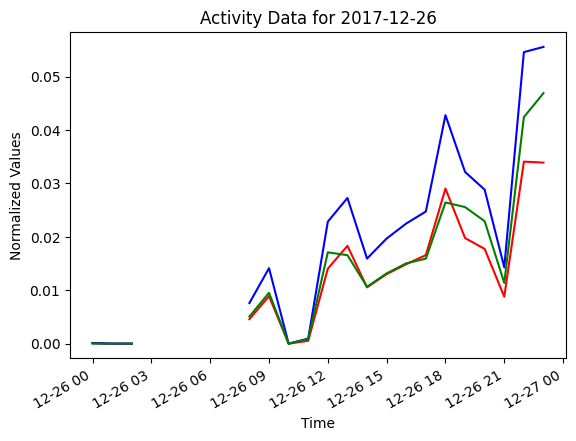

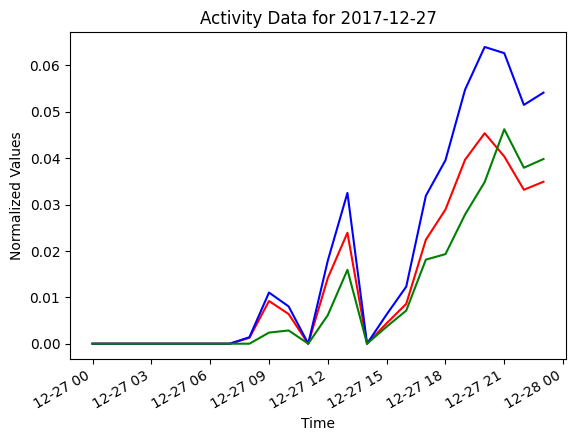

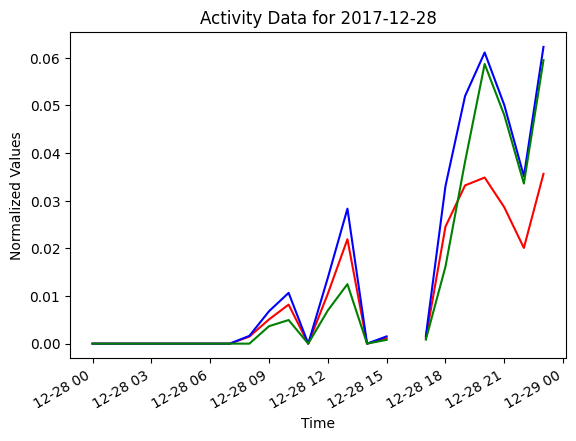

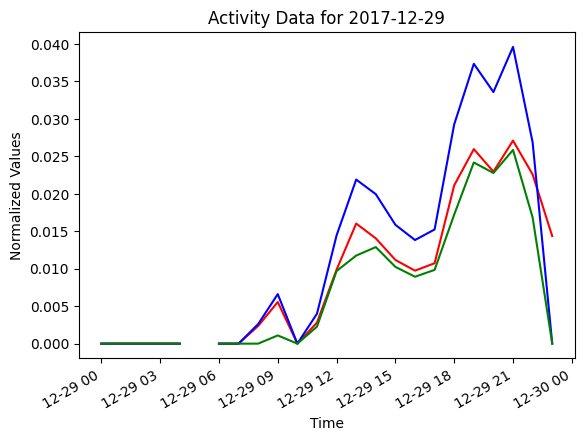

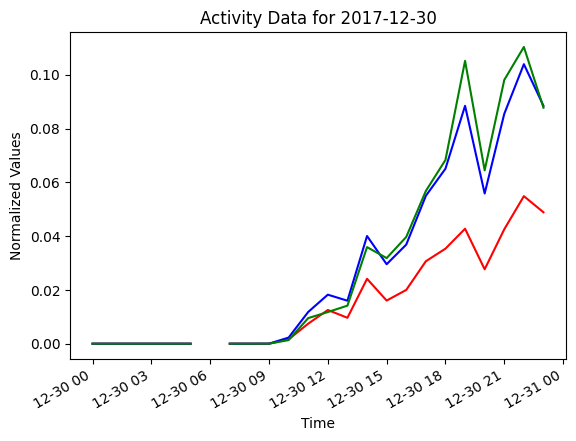

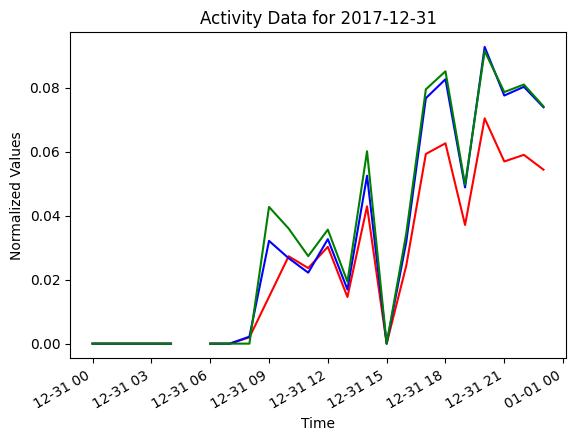

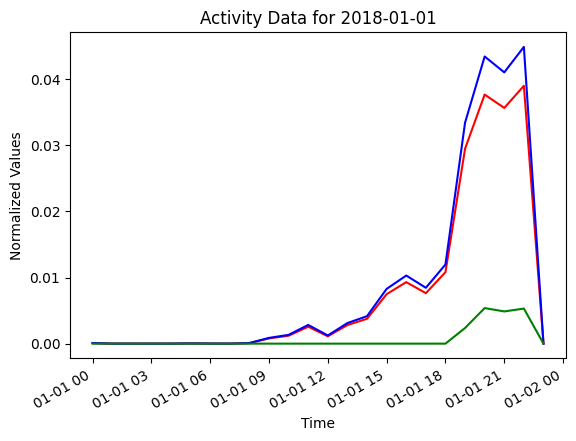

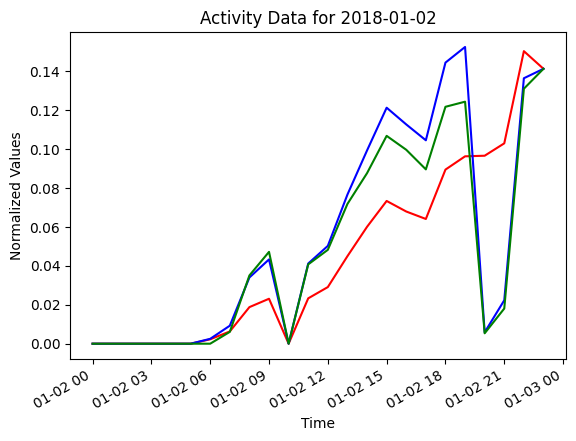

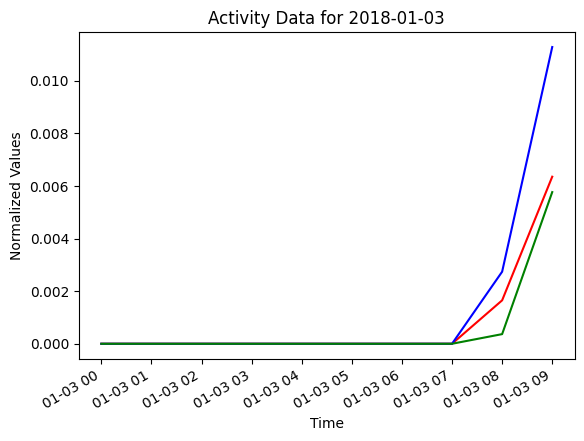

In [58]:
# Convert the index to a DataFrame
df_index = pd.DataFrame({'date': data.index.date})

# Get the unique dates in the dataset
unique_dates = df_index['date'].unique()
# Iterate through the dates and plot the graph for each date
for date in unique_dates:
    # Filter the data for the current date
    date_data = data.loc[data.index.date == date]
    
    # Resample the data by hour and normalize the values
    hourly_data = date_data[['num_steps', 'calories', 'altitude']].resample('H').mean()
    
    # Create a plot chart of the data
    plt.plot(hourly_data.index, hourly_data['num_steps'], color="red", label = 'steps')
    plt.plot(hourly_data.index, hourly_data['calories'], color="blue", label = 'scalories')
    plt.plot(hourly_data.index, hourly_data['altitude'], color="green",label = 'Altitude')
    
    # Add a title and axis labels
    plt.title('Activity Data for {}'.format(date.strftime('%Y-%m-%d')))
    plt.xlabel('Time')
    plt.ylabel('Normalized Values')
    
    # Automatically adjust the x-axis labels
    plt.gcf().autofmt_xdate()
    
    # Display the plot
    plt.show()


**Obervation:**
- after analysis these graph welearn about a behavour of user.
- User wake up or start there day arounf 8am most of his weekdays.
- on weekend user wakeup or start his day around 10am 
- User mostly active on 2 Jan because that day he wake up around 6am and burn high calories, reach at highest altitude and cover highest number of steps also.